<a href="https://colab.research.google.com/github/rajy4683/S10EVA4/blob/master/S10EVA4_GCAM_LRF5_MAug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑¬∑
Mounted at /content/drive


In [2]:
!nvidia-smi

Mon Mar 30 16:21:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    27W / 250W |      0MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  


### **[RekogNizer library](https://github.com/rajy4683/RekogNizer.git) contains the following files:**
```
1. basemodelclass.py:   Contains core model definitions. 
2. fileutils.py:        Contains utility functions for model_name_generation, plotting functions 
3. dataloader.py:       Contains dataloaders for both training and test data
4. traintest.py:        Contains core training, test and model execution flow routines. 
5. logger.py:           Contains functions to handle WANDB integration
6. hyperparams.py:      Contains values of default hyperparameters alongwith getter and setter functions   
7. train_s7_new.py:     Main wrapper script or point of entry. It parses hyperparameters as arguments
8. requirements.txt:    Specific libraries that need to be available in the environment
```








#### Downloading and installing dependencies from the GitHub link:


In [0]:
!git clone https://github.com/rajy4683/RekogNizer.git /content/drive/My\ Drive/EVA4/RekogNizer

In [3]:
!pip install -r /content/drive/My\ Drive/EVA4/RekogNizer/requirements.txt

     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112kB 4.9MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 1.4MB 15.4MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 460kB 57.4MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 112kB 61.3MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 102kB 13.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 102kB 14.0MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 634kB 66.6MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 71kB 10.5MB/s 
     |‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà

In [4]:
!pip install -U git+https://github.com/albu/albumentations

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-hm5dpwlx
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-hm5dpwlx
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=65100 sha256=1db1e294e31d6da4196e8e5433ed027860b4805b5670247b80ff0c59675a7a3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-56bo7roz/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


#### WANDB client login

In [5]:
!wandb login a6f947d2d2f69e7a8c8ca0f69811fd554f27d204

wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
Successfully logged in to Weights & Biases!


In [0]:
sys.path.append('/content/drive/My Drive/EVA4/')
sys.path.append('/content/drive/My Drive/EVA4/RekogNizer')

train_s8_new.py currently can take JSON formatted string as input. Following parameters are configurable and are used in the model training and execution.
```
{"project": "news5", 
 "sched_lr_gamma": 0.5, 
 "no_cuda": false, 
 "dropout": 0.1, 
 "test_batch_size": 128, 
 "batch_size": 128, 
 "epochs": 45, 
 "bias": false, 
 "lr": 0.001, 
 "start_lr": 0, 
 "sched_lr_step": 1, 
 "weight_decay": 0.0, 
 "seed": 1, 
 "momentum": 0.9}

```


#### Cutout + Horizontal Flip

In [0]:
%matplotlib notebook
!python /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":0.21694816106338752,"dropout":0.1, "momentum":0.7062620648684866, "epochs":100, "weight_decay":0.00015753761358641488}'

  File "/content/drive/My Drive/EVA4/RekogNizer/train_s9_new.py", line 41
    %matplotlib inline
    ^
SyntaxError: invalid syntax


### Cutout + Horizontal Flip + MotionBlur

In [0]:
from RekogNizer import train_s9_new

In [0]:
%load_ext autoreload

Files already downloaded and verified
Files already downloaded and verified
torch.Size([128, 3, 32, 32]) tensor([-0.0151, -0.0195, -0.0003]) tensor([0.9201, 0.9175, 0.8830])


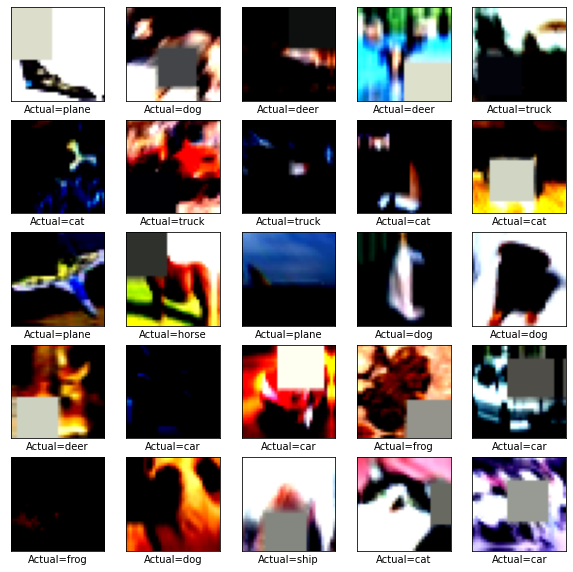

In [21]:
%autoreload 2
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader
from RekogNizer import lrfinder


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim


from RekogNizer import hyperparams
hyper_param_values = {
                      "lr":0.21694816106338752,
                      "dropout":0.1, 
                      "momentum":0.7062620648684866, 
                      "epochs":100, 
                      "weight_decay":0.00015753761358641488
                      }
hyperparams.set_hyperparam(hyper_param_values)

trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

torch.manual_seed(1)
dataiter = iter(trainloader)
images, labels = dataiter.next()

fileutils.show_sample_images(images,labels, dataloader.classes)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR plotting in progress


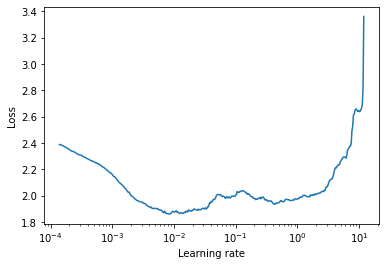

(1.8595986313975768, 13.677288255958489, 0.00831763771102671)

In [22]:
from RekogNizer import dataloader

model_new = basemodelclass.ResNet18(hyperparams.hyperparameter_defaults['dropout'])
#model_new = basemodelclass.ResNet18(0.4177620996926812)
torch.manual_seed(1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model_new.parameters(), lr=0.0001, weight_decay=0.0,momentum=0.9)
lr_finder = lrfinder.LRFinder(model_new, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=500, step_mode="exp")


lr_finder.plot()
lr_finder.reset()
np.min(lr_finder.history['loss']),np.max(lr_finder.history['lr']),lr_finder.history['lr'][np.argmin(lr_finder.history['loss'])]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()
LR plotting in progress


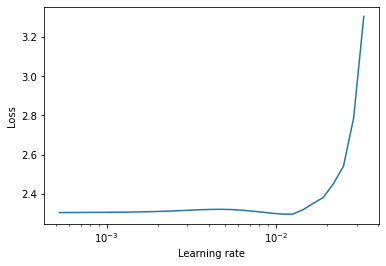

2.296488312115166


0.012589254117941668

In [0]:
lr_finder.range_test(trainloader, val_loader=testloader, end_lr=100, num_iter=100, step_mode="exp")
lr_finder.plot()
lr_finder.reset()
print(np.min(lr_finder.history['loss']))
lr_finder.history['lr'][np.argmin(lr_finder.history['loss'])]

In [26]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":0.00831763771102671, "momentum":0.9, "epochs":50, "weight_decay":0.0}'

Setting  lr  =  0.00831763771102671
Setting  momentum  =  0.9
Setting  epochs  =  50
Setting  weight_decay  =  0.0
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.00831763771102671 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
Files already downloaded and verified
Files already downloaded and verified
Initializing datasets and dataloaders
wandb: Tracking run with wandb version 0.8.31
wandb: Run data is saved locally in wandb/run-20200330_172530-14ytbzx3
wandb: Syncing run olive-cosmos-927
wandb: ‚≠êÔ∏è View project at https://app.wandb.ai/rajy4683/news5
wandb: üöÄ View run at https://app.wandb.ai/rajy4683/news5/runs/14

In [23]:
!python  /content/drive/My\ Drive/EVA4/RekogNizer/train_s9_new.py -p '{"lr":0.030478949896279826, "momentum":0.9, "epochs":50, "weight_decay":0.0}'

Setting  lr  =  0.030478949896279826
Setting  momentum  =  0.9
Setting  epochs  =  50
Setting  weight_decay  =  0.0
Final Hyperparameters
             dropout : 0.1 
          batch_size : 128 
     test_batch_size : 128 
                  lr : 0.030478949896279826 
            momentum : 0.9 
             no_cuda : False 
                seed : 1 
              epochs : 50 
                bias : False 
      sched_lr_gamma : 0.5 
       sched_lr_step : 1 
            start_lr : 0 
        weight_decay : 0.0 
  lr_decay_threshold : 0.0 
              factor : 0.0 
             project : news5 
Files already downloaded and verified
Files already downloaded and verified
Initializing datasets and dataloaders
wandb: Tracking run with wandb version 0.8.31
wandb: Run data is saved locally in wandb/run-20200330_163839-1ejmp0qb
wandb: Syncing run crisp-sun-925
wandb: ‚≠êÔ∏è View project at https://app.wandb.ai/rajy4683/news5
wandb: üöÄ View run at https://app.wandb.ai/rajy4683/news5/runs/1ej

#### The APIs for inferencing and plotting are moved out of the training script.


In [0]:
from RekogNizer import traintest
from RekogNizer import logger
from RekogNizer import fileutils
from RekogNizer import basemodelclass
from RekogNizer import dataloader

import pandas as pd
import numpy as np
import torch

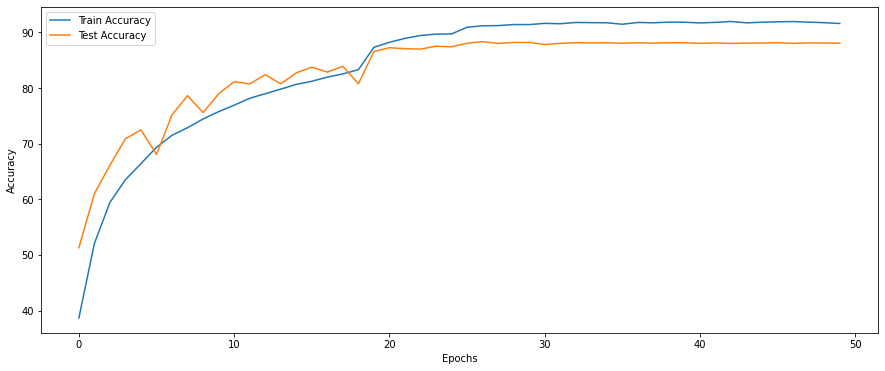

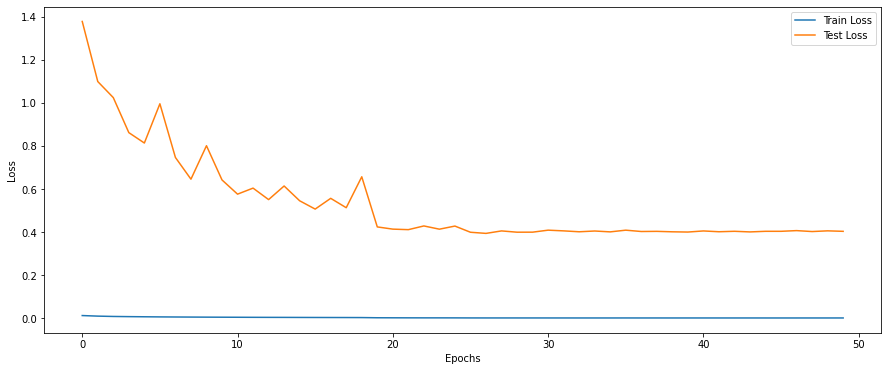

In [27]:
run_list = ['rajy4683/news5/runs/14ytbzx3']
runs_df = logger.get_wandb_dataframes(run_list=run_list)#(project="rajy4683/news5",count=1)
new_df = pd.DataFrame().append(runs_df)


fileutils.plot_graphs([new_df],
            ['Train Accuracy', 'Test Accuracy'],
            columns=['Train Accuracy', 'Test Accuracy'],
            xlabel="Epochs",
            ylabel="Accuracy")

fileutils.plot_graphs([new_df],
            ['Train Loss', 'Test Loss'],
            columns=['Train Loss', 'Test Loss'],
            xlabel="Epochs",
            ylabel="Loss")

In [30]:
%load_ext autoreload
%autoreload 2
from RekogNizer import traintest
import torchvision.transforms as transforms
import torchvision

#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-23b3505819.h5")
#my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-15ad50e1bc.h5", local_device=torch.device("cpu"))
my_model,acc = traintest.model_builder2(basemodelclass.ResNet18(), weights_path="/content/drive/My Drive/EVA4/model_saves/model-2fba2384bd.h5", local_device=torch.device("cpu"))

#class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, classes, device=torch.device("cpu"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
from RekogNizer import hyperparams
# transform_test = transforms.Compose(
#     [transforms.ToTensor(),
#     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# testset = torchvision.datasets.CIFAR10(root='./data', train=False,
#                                     download=True, transform=transform_test)
# testloader = dataloader.get_dataloader(testset, hyperparams.hyperparameter_defaults['batch_size'], shuffle=False, num_workers=2)

trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()

class_accuracy_dict = traintest.classwise_accuracy(my_model, testloader, dataloader.classes, device=torch.device("cuda"))

Files already downloaded and verified
Files already downloaded and verified
Accuracy of plane : 87 %
Accuracy of   car : 94 %
Accuracy of  bird : 82 %
Accuracy of   cat : 74 %
Accuracy of  deer : 88 %
Accuracy of   dog : 81 %
Accuracy of  frog : 90 %
Accuracy of horse : 91 %
Accuracy of  ship : 93 %
Accuracy of truck : 93 %


<BarContainer object of 10 artists>

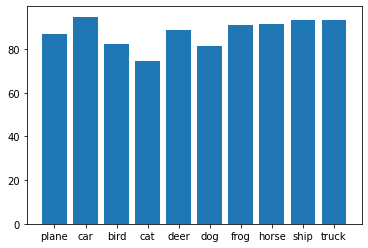

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.bar([key for key in class_accuracy_dict.keys()],[val for val in class_accuracy_dict.values()])

Files already downloaded and verified
Files already downloaded and verified
1187
(1187,)
88.13 -10.550984750366212


<Figure size 720x720 with 0 Axes>

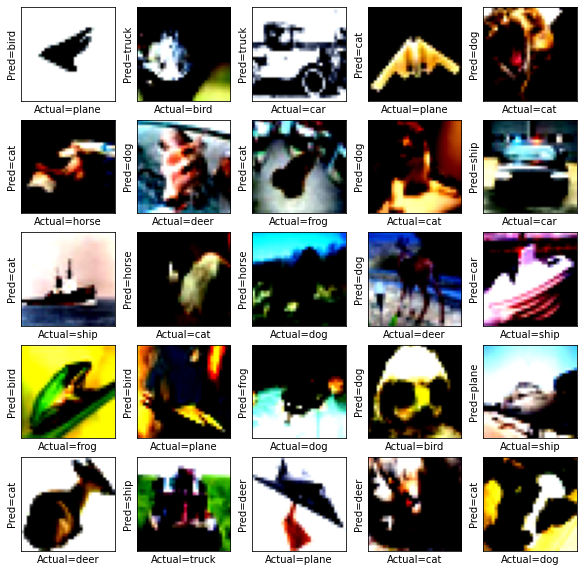

In [34]:
from RekogNizer import traintest
type(my_model)
classes = dataloader.classes
trainloader, testloader = dataloader.get_train_test_dataloader_cifar10()
epoch_test_acc,epoch_test_loss,error_images, preds, actuals = traintest.plot_misclassified(None, my_model.to(torch.device("cuda")), torch.device("cuda"), testloader, classes,1)
print(epoch_test_acc,epoch_test_loss)

fig = plt.figure(figsize=(10,10))
for idx in np.arange(25):
    ax = fig.add_subplot(5, 5, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(error_images[idx].cpu().numpy(), (1, 2, 0)))
    #ax.set_title("Pred="+str(np.int(preds[idx])))
    #ax.set(ylabel="Pred="+str(np.int(preds[idx])), xlabel="Actual="+str(np.int(actuals[idx])))
    ax.set(ylabel="Pred="+classes[np.int(preds[idx])], xlabel="Actual="+classes[np.int(actuals[idx])])

# GRADCAM Visualizations

In [0]:
import os
import PIL
import numpy as np
import torch
import torch.nn.functional as F
import torchvision.models as models
from torchvision.utils import make_grid, save_image

from RekogNizer.gradcam2 import *

saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])


/content/drive/My Drive/EVA4/RekogNizer/gradcam2.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])
saliency_map size : torch.Size([8, 8])


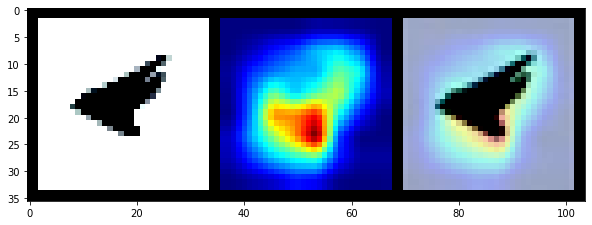

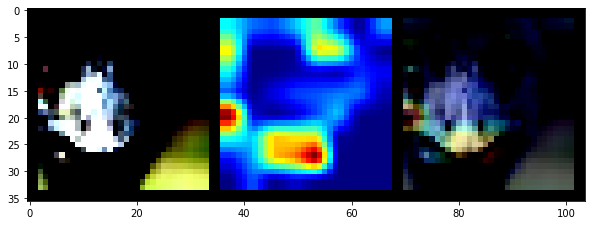

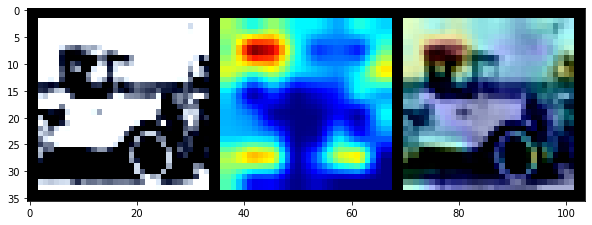

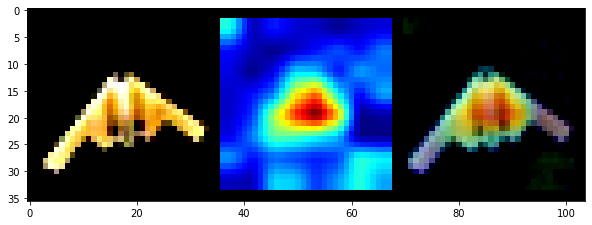

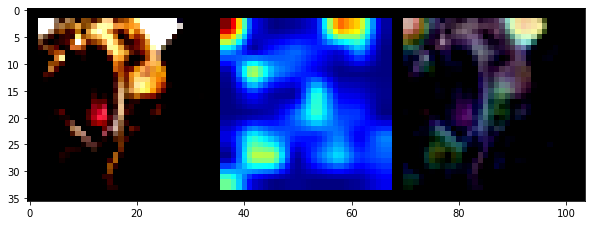

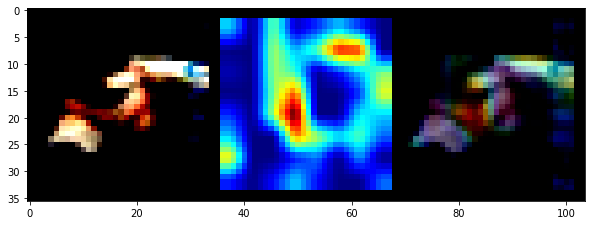

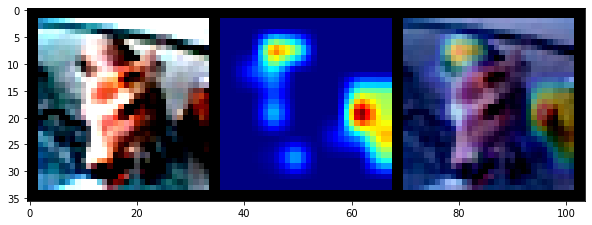

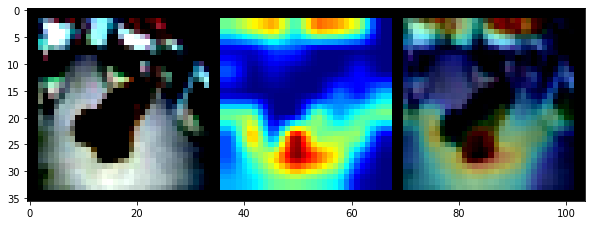

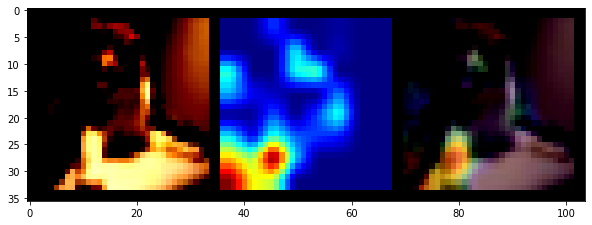

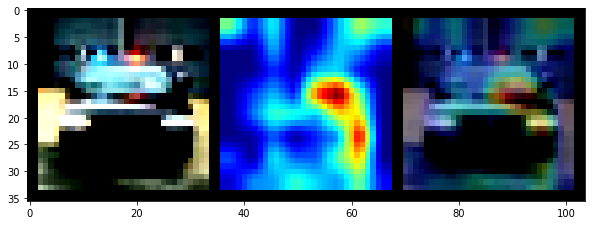

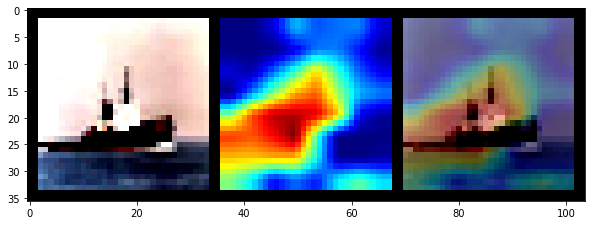

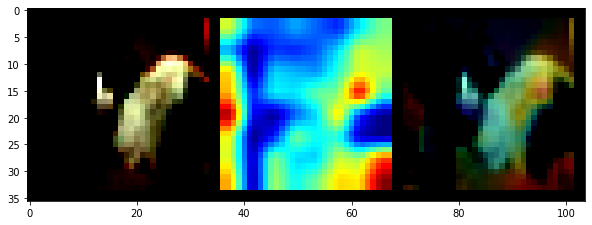

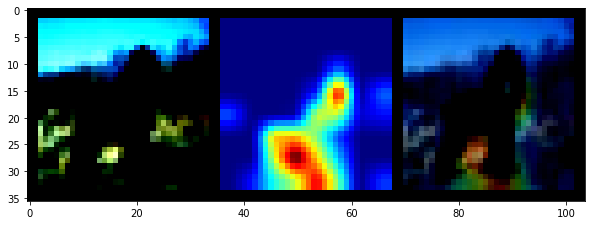

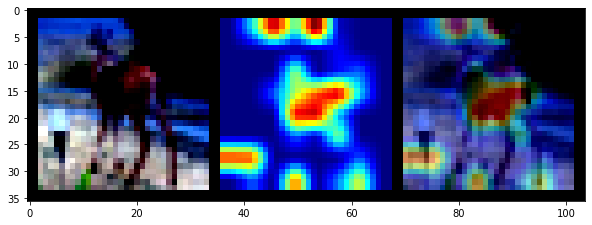

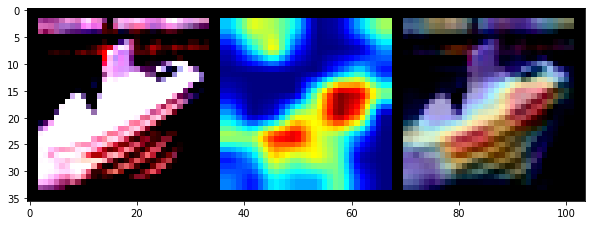

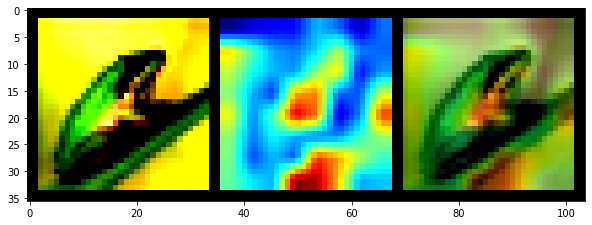

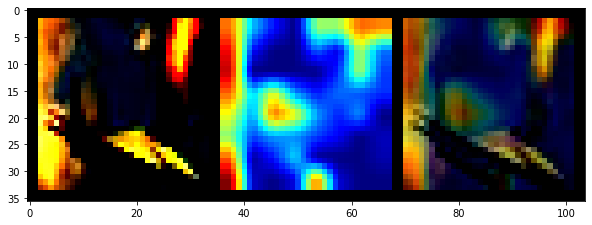

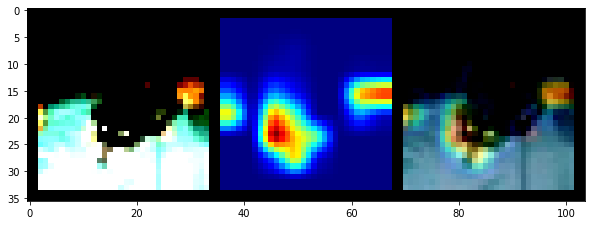

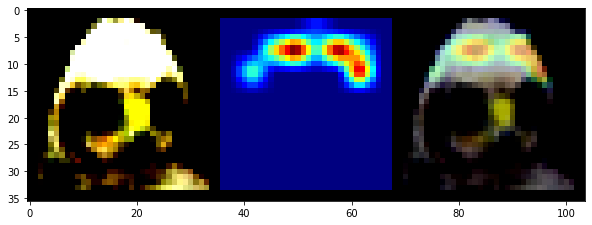

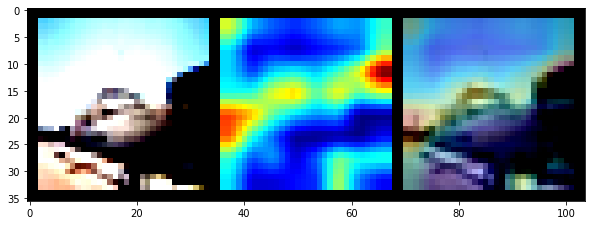

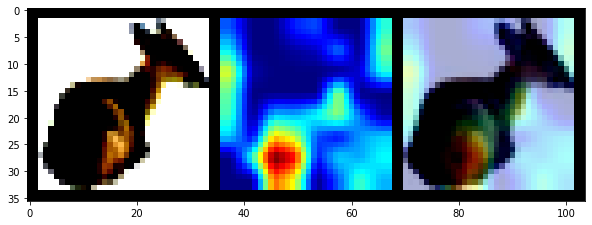

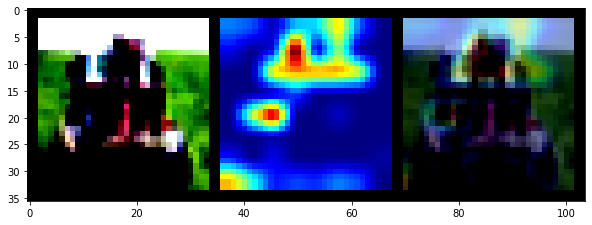

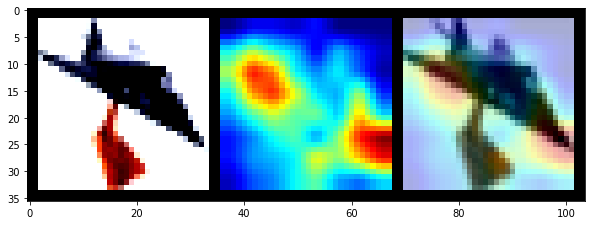

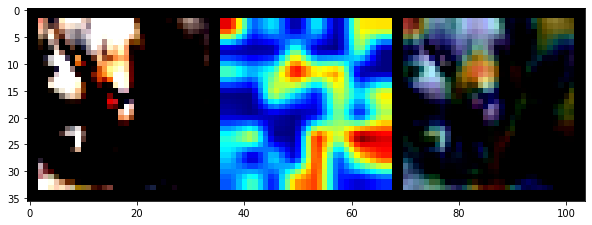

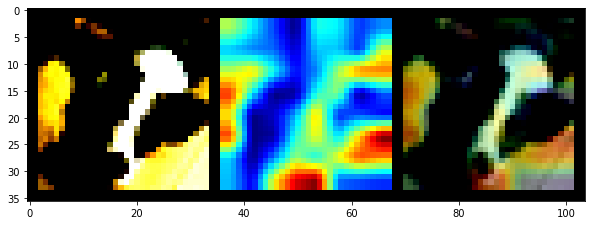

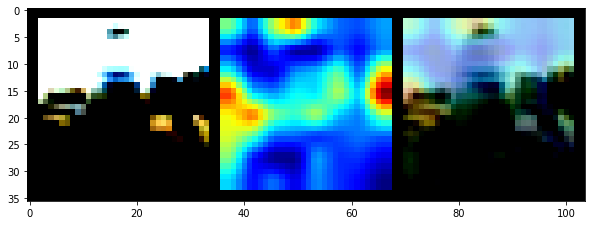

In [37]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer3', input_size=(32, 32))
for image in error_images[:26]:
    visualize_gradcam_image(resnet_model_dict,image, mean=[0.4827, 0.4724, 0.4427], std=[0.2482, 0.2501, 0.2698])

saliency_map size : torch.Size([4, 4])


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


/content/drive/My Drive/EVA4/RekogNizer/gradcam2.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(10,10))


saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])
saliency_map size : torch.Size([4, 4])


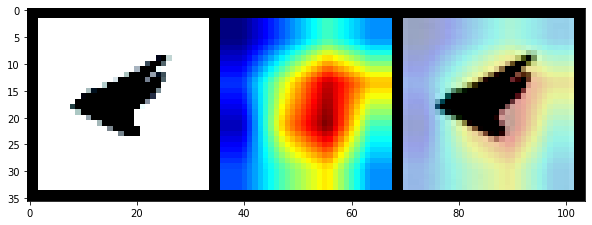

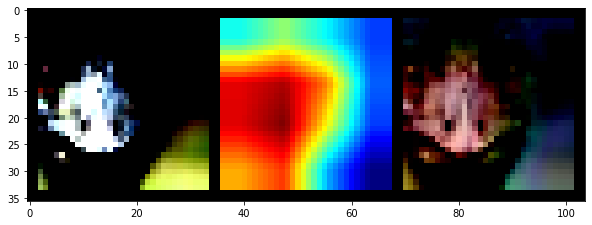

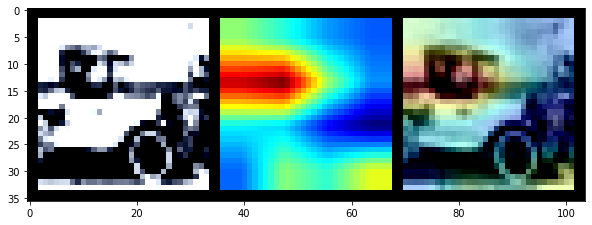

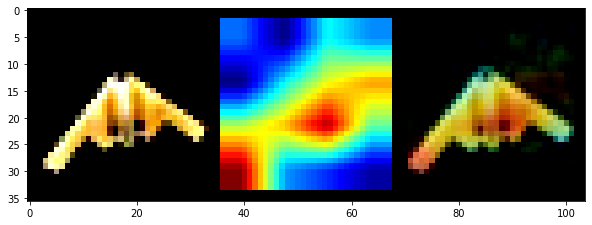

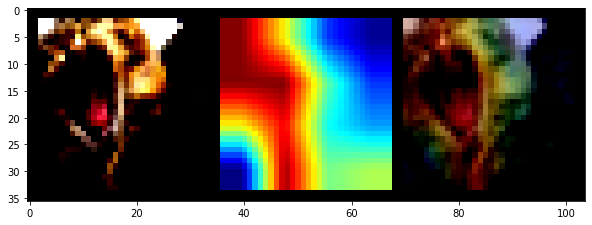

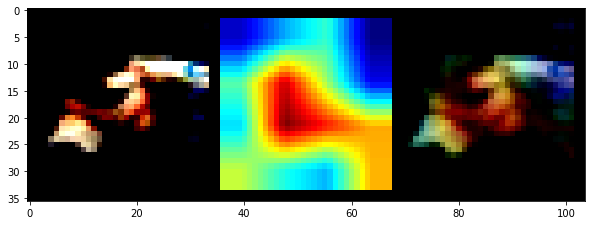

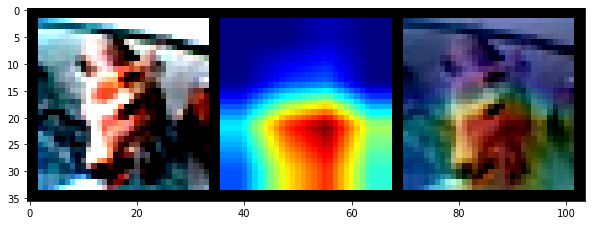

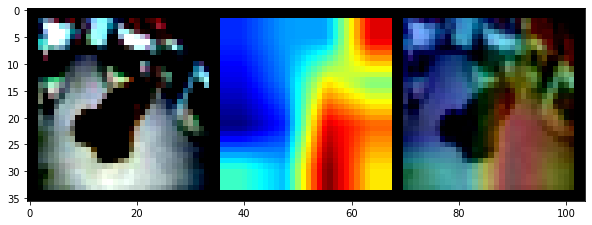

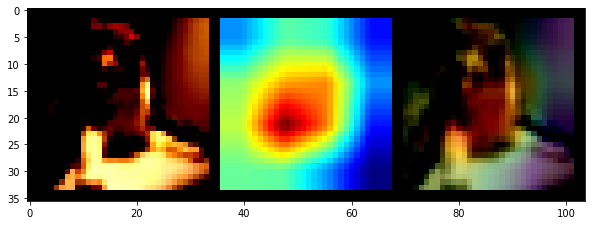

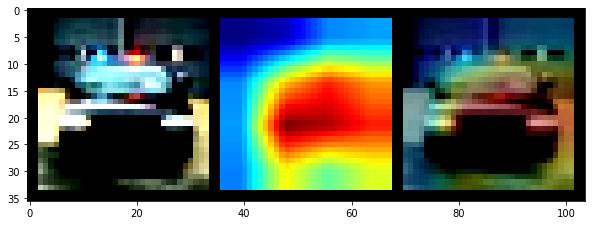

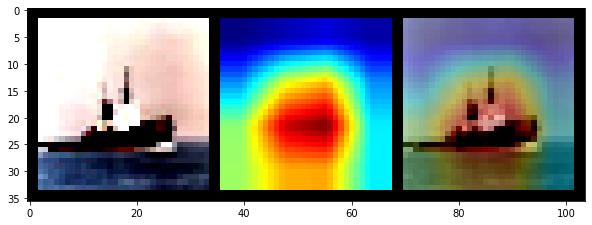

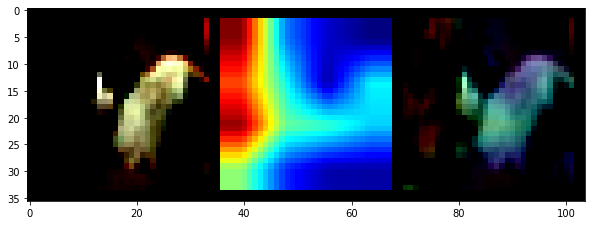

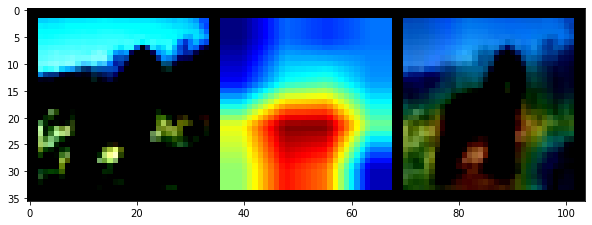

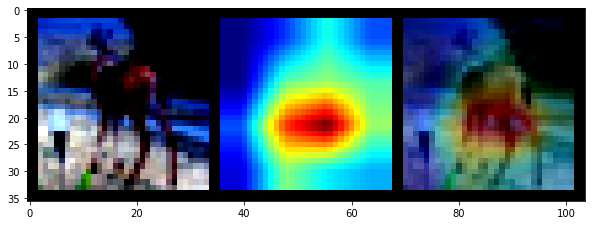

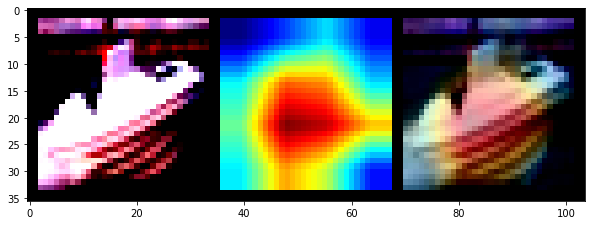

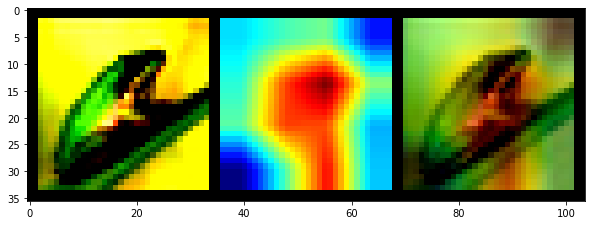

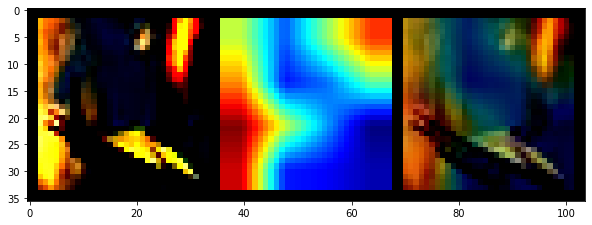

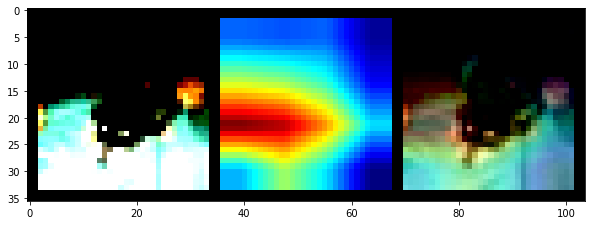

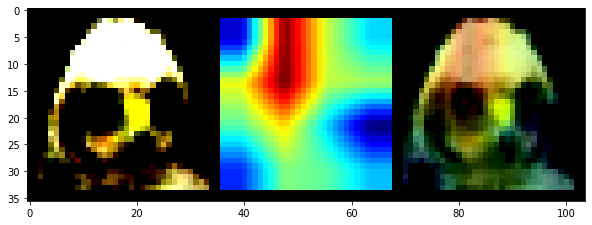

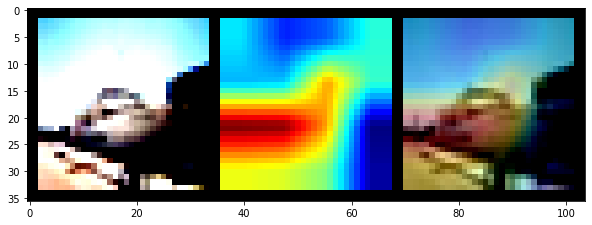

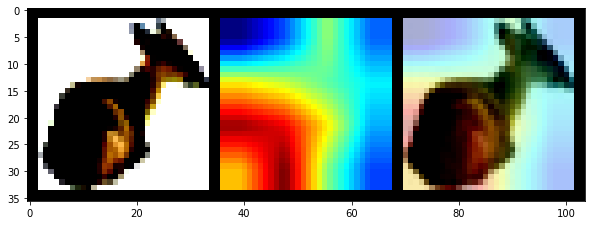

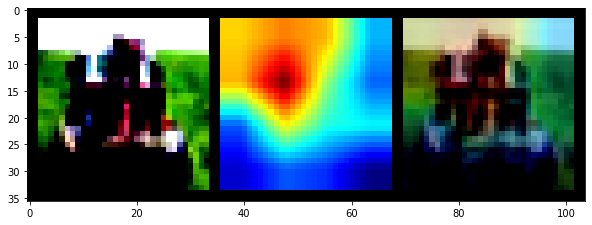

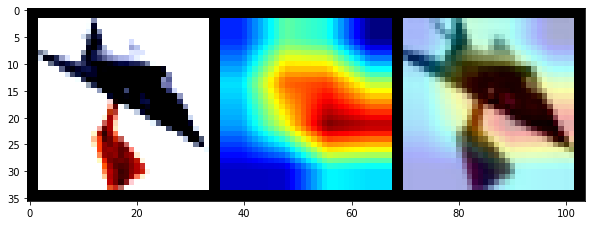

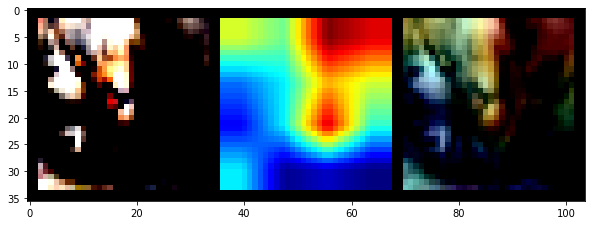

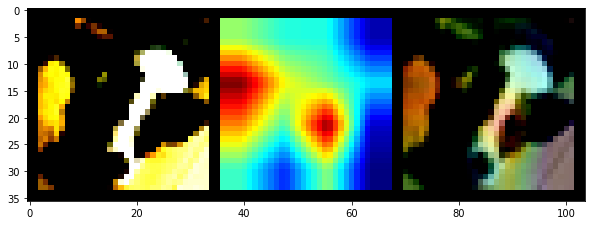

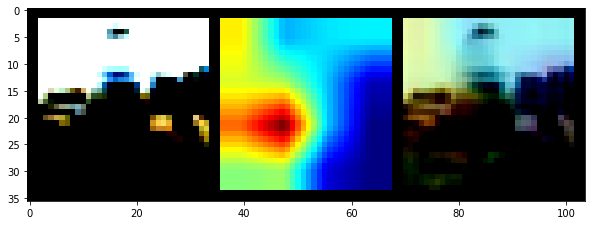

In [36]:
resnet_model_dict = dict(type='resnet', arch=my_model.to(torch.device("cpu")), layer_name='layer4', input_size=(32, 32))
for image in error_images[:26]:
    visualize_gradcam_image(resnet_model_dict,image, mean=[0.4827, 0.4724, 0.4427], std=[0.2482, 0.2501, 0.2698])

In [0]:
!wandb agent rajy4683/uncategorized/0b5jkwy3